# API

Raw code snippets for api part

In [74]:
import numpy as np
import mlflow
import mdsist.util as util

from fastapi import FastAPI
from pydantic import BaseModel
import matplotlib.pyplot as plt

# Load packages
from torchinfo.layer_info import LayerInfo
import torchinfo

from mdsist.dataset import MdsistDataset
from mdsist.config import DATA_DIR, PROCESSED_DATA_DIR
from mdsist.predictor import Predictor

import mlflow
import mlflow.pytorch

import mdsist.util as util
import json
import requests

from dotenv import load_dotenv

# Load envionment variables
load_dotenv()

True

## Implementation

In [75]:
## Import model from MLFlow, with below URI
MODEL_URI = 'runs:/10cb51b288134c48835a8c0b9fe66eca/model_20240930190709'
#'models:/CNNv1-production/'

device = util.get_available_device()

model = mlflow.pytorch.load_model(MODEL_URI, map_location=device)

pred = Predictor(model)

In [76]:
app = FastAPI()

In [77]:
class PredictionRequest(BaseModel):
    image: list # The input data should be an array list of 256 pixel


@app.get("/test")
async def test():
    return "It works"

@app.post("/mnist-model-prediction/")
async def predict(data: PredictionRequest):
    # pass the image as byte, then from buffer.
    
    image_array = np.frombuffer(dtype= np.uint8) # this method interprets a buffer as a 1D array. 

    # reshape uint8 to below structure
    # shape (N, 1, H, W) # N = degree of freedom, -1.  H = 28, W = 28

    images = image_array.reshape((-1, 1, 28, 28))
    
    prediction = pred.predict(images)

    print(prediction)
    #return{"prediction": int(prediction[0])}


### Predictor test

In [78]:
## Import model from MLFlow, with below URI
MODEL_URI = "runs:/10cb51b288134c48835a8c0b9fe66eca/model_20240930190709"
#'models:/CNNv1-production/'

device = util.get_available_device()

model = mlflow.pytorch.load_model(MODEL_URI, map_location=device)

pred = Predictor(model)

In [79]:
test_dataset = MdsistDataset(PROCESSED_DATA_DIR / 'test.parquet')
image_dict = test_dataset.data.loc[0, "image"]
image_array = test_dataset.decode_png_image(image_dict)
image = image_array.tobytes()

In [80]:
print(image_array)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  45 229 255 188   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 124 253 253 187   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 124 253 253 187   0   0   0   0  80
  107  21   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 124 253 253 187   0   0   0  77 239
  253  70   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 124 253 253 187   0   0   

## API test

In [81]:

with open(DATA_DIR /'images_jpg/test/0/13.jpg', 'rb') as p:
    image = p.read()

In [82]:
def get_img_bytes(ind):
    test_dataset = MdsistDataset(PROCESSED_DATA_DIR / 'test.parquet')
    image_dict = test_dataset.data.loc[ind, "image"]
    image_array = test_dataset.decode_png_image(image_dict)
    image = image_array.tobytes()
    # Plot the image
    plt.imshow(image_array, cmap='gray')
    plt.axis('off')
    plt.show()
    return image

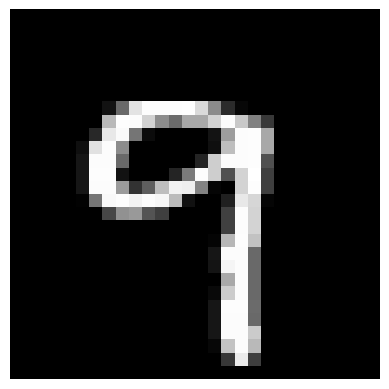

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x12i\xe3\xfd\xfd\xfd\xfe\xda\x8b+\x07\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xb9\xfd\xfc\xd2\x8dk\xa8\xa8\xd2\xfc\xc8\x819\x00\x00\x00\x00\x00\x00\x00\x00\x

In [83]:
get_img_bytes(4)

In [84]:
response = requests.get("http://localhost:8000/test")
print(json.loads(response.text))

It works


In [85]:
response = requests.get("http://localhost:8000/info")
print(json.loads(response.text))

{'Name': 'MDSIST-CNN', 'Short Description': 'This is a Convolutional Neural Network (CNN) model to classify grayscale images from the MNIST dataset.', 'Description': 'The primary intended use of this model is to classify images of handwritten digits from the MNIST datasetinto one of ten categories (0-9). It was specifically designed for image classification tasks withoutrequiring additional fine-tuning or integration into larger applications. This model is ideal for educational, research, and benchmarking purposes within the field of machine learning, particularly in the area of digit recognition.', 'Layers': {'CNN (CNN)': ['Conv2d (conv1): 1-1', 'Conv2d (conv2): 1-2', 'Linear (fc1): 1-3', 'Linear (fc2): 1-4', 'MaxPool2d (pool): 1-5']}, 'Total parameters': 206922, 'Trainable params': 206922, 'Total param bytes': 827688}


Now, it should work fine

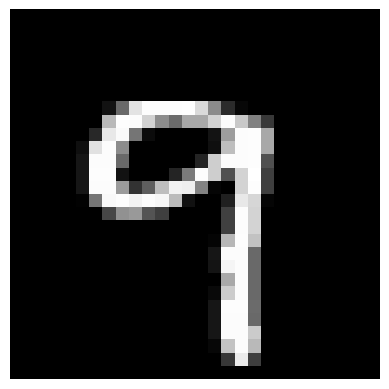

{"prediction":[2]}


In [86]:
# Set the headers to indicate the content type as 'application/octet-stream'
headers = {'Content-Type': 'application/octet-stream'}
resp = requests.post("http://localhost:8000/mnist-model-prediction", headers=headers,data=get_img_bytes(4))
print(resp.text)

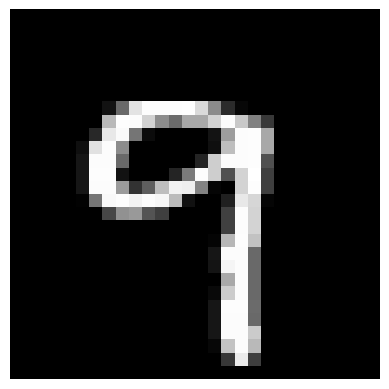

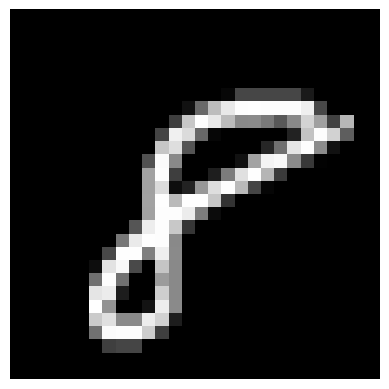

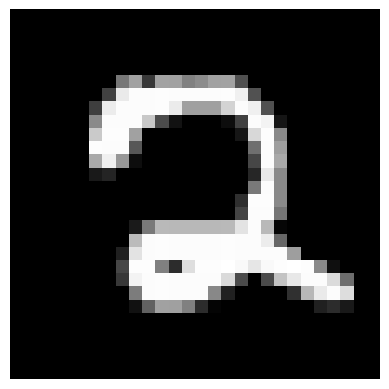

{"prediction":[2,8,4]}


In [87]:
headers = {'Content-Type': 'application/octet-stream'}
resp = requests.post("http://localhost:8000/mnist-model-prediction", headers=headers,data=get_img_bytes(4)+get_img_bytes(85)+get_img_bytes(66))
print(resp.text)

### Summary testing

In [88]:
a:torchinfo.ModelStatistics = torchinfo.summary(model)


more testing

In [89]:
a.total_param_bytes
t:list[LayerInfo] = a.summary_list
li:LayerInfo = t[3]
li.get_layer_name(True,True)

'Linear (fc1): 1-3'